# Data Analysis of Inc.5000 company using Pandas

Inc. 5000 (https://www.inc.com/inc5000) has established itself as a company that provides lists of top ranked companies poised for the fastest annual growth. 
To qualify, companies must have been founded and generating revenue by March 31, 2014. They must be U.S.-based, privately held, for- profit, and independent--not subsidiaries or divisions of other companies--as of December 31, 2017. (Since then, some on the list have gone public or been acquired.) The minimum revenue required for 2014 is  $100,000; the minimum for 2017 is $2 million. Growth rates used to determine company rankings were calculated to two decimal places. In the case of ties, the companies with more revenue were placed higher. 

This Notebook contains data analysis for the list of top ranked 5000 companies that are listed on the website.

- We will start our analysis by importing necassary libraries. Matplotlib.pyplot module contains the Matplotlib library’s graphing capabilities that we use.  This module typically is imported with the name plt.The NumPy (Numerical Python) library includes the function unique that we’ll use to summarize our analysis.The numpy module typically is imported as np. The seaborn module contains the Seaborn library’s graphing capabilities we use. This module typically is imported with the name sns. Lastly, we need to import nan as NA to assist us in data cleaning, we need to remove all the null values for processing. 

In [ ]:
import numpy as np
import pandas as pd
from numpy import nan as NA
import matplotlib.pyplot as plt
import seaborn as sns

- Let us load the excel file to begin our analysis. We can do this by using pandas read_excel function that accepts several arguments. The first argument we use is the data, and the second argument is the index_col argument that sets our desired column as index. For this analysis, we want to use "Rank" column as index.

In [ ]:
# Load HW4_inc5000-2018.xlsx to begin our analysis for Inc.5000 company.

path = ''
inc5000_2018_df = pd.read_excel(path + "HW4_inc5000-2018.xlsx", index_col = 'RANK')

In [ ]:
# Count the number of rows for the loaded data frame

inc5000_2018_df['COMPANY NAME'].count()

5000

- Let us display the top 25 ranked companies and all the data associated with them. To do this, we can use built-in head() function, it accepts an argument that specifies the number of rows we want to see.

In [ ]:
# Display top 25 ranked companies in the data frame  to view what our data looks like.

inc5000_2018_df.head(25)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",Unnamed: 14,Unnamed: 15
RANK,,,,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,Wisconsin,WI,98965631,53719,2013.0,Logistics & Transportation,"Madison, WI",Makes software for the logistics industry that...,During stints as a freight broker and shipping...
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,Colorado,CO,168837562,80301,2010.0,Consumer Products & Services,"Boulder, CO","Makes self-adhesive, collapsible, expandable c...",Frustrated with his iPhone headphones getting ...
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,Illinois,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",NaN,NaN
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,Colorado,CO,49175942,80205,2013.0,Business Products & Services,"Denver-Aurora-Lakewood, CO",NaN,NaN
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,Arizona,AZ,219574136,85258,2013.0,Energy,"Phoenix-Mesa-Scottsdale, AZ",NaN,NaN
6,https://www.inc.com/profile/aeronux-airways,Marietta,20005.2390,17,Aeronux Airways,aeronux.com,Georgia,GA,21874500,30066,2011.0,Logistics & Transportation,"Atlanta-Sandy Springs-Roswell, GA",NaN,NaN
7,https://www.inc.com/profile/diamond-assets,Milton,19717.5129,41,Diamond Assets,diamond-assets.com,Wisconsin,WI,43084462,53563,2014.0,Computer Hardware,"Janesville, WI",NaN,NaN
8,https://www.inc.com/profile/gforce-life-sciences,Chicago,16426.6575,13,GForce Life Sciences,http://gforcestaff.com,Illinois,IL,16893384,60606,2013.0,Human Resources,"Chicago-Naperville-Elgin, IL-IN-WI",NaN,NaN
8,https://www.inc.com/profile/flexport,San Francisco,15911.2237,532,Flexport,http://flexport.com,California,CA,224745864,94102,2013.0,Logistics & Transportation,"San Francisco-Oakland-Hayward, CA",NaN,NaN


## Data cleaning

From the above data frame, it is clear that there are several NAN value. We can do some cleaning using two different modification. We want to acheive tidy data for processing.
1. Filtering values
2. Imputing values

- Let us get a better observation of our data that have null values by using isnull() and sum() functions.

In [ ]:
# Count all of the rows, by column (default axis=0)

inc5000_2018_df.isnull().sum()

URL                0
CITY               1
GROWTH             0
EMPLOYEES          0
COMPANY NAME       0
WEBSITE            0
CITY.1             1
STATE              1
REVENUW            0
ZIP CODE           0
FOUNDED            1
INDUSTRY           0
CITY, STATE       24
Unnamed: 14     4998
Unnamed: 15     4998
dtype: int64

### Filtering values
- We have the option of dropping the two unnamed columns as they only have little information about our data.
- We can also drop CITY,STATE column as it has little significance in this analysis.

In [ ]:
# Drop all columns that do not have at least 25 non-NA values

inc5000_2018_df = inc5000_2018_df.dropna(thresh=26, axis=1)

# Drop CITY, STATE column

inc5000_2018_df =inc5000_2018_df.drop(['CITY, STATE'], axis = 1)
inc5000_2018_df.isnull().sum()


URL             0
CITY            1
GROWTH          0
EMPLOYEES       0
COMPANY NAME    0
WEBSITE         0
CITY.1          1
STATE           1
REVENUW         0
ZIP CODE        0
FOUNDED         1
INDUSTRY        0
dtype: int64

### Imputing values

- We are able to impute values for CITY and STATE column because we have that information from column CITY, STATE. We can use fillna() function to impute values.
- One important thing here is, two columns with the same name exist so we need to modify one of them. To do that, we can use the rename() function that takes on "columns" as one of the arguments.
    - Quickly update CITY.1 to CITY1

In [ ]:
# Impute values to CITY and STATE by column
# rename CITY column because it is duplicate and it causes error in processing

inc5000_2018_df = inc5000_2018_df.rename(columns={'CITY.1':'CITY1'})
inc5000_2018_df = inc5000_2018_df.fillna({'CITY1':'SILVERTHORNE' , 'STATE': 'CO'})
inc5000_2018_df.isnull().sum()

URL             0
CITY            1
GROWTH          0
EMPLOYEES       0
COMPANY NAME    0
WEBSITE         0
CITY1           0
STATE           0
REVENUW         0
ZIP CODE        0
FOUNDED         1
INDUSTRY        0
dtype: int64

- Now we can drop one row for founded column that has NA.

In [ ]:
# Drop any row with missing values

inc5000_2018_cleaned_df = inc5000_2018_df.dropna()
inc5000_2018_cleaned_df.isnull().sum()

URL             0
CITY            0
GROWTH          0
EMPLOYEES       0
COMPANY NAME    0
WEBSITE         0
CITY1           0
STATE           0
REVENUW         0
ZIP CODE        0
FOUNDED         0
INDUSTRY        0
dtype: int64

- OUR DATA IS NOW CLEAN AND READY FOR PROCESSING!!!

## Load data from HW4_states_by_region.csv file and merge with the exising data frame

- We want "Region" column in our data frame so let us first load "HW4_states_by_region.csv". We can do this by using pandas read_csv() function.

In [ ]:
# Load "HW4_states_by_region.csv" in to a data frame in order to merge it with our previous data frame

states_by_region_df = pd.read_csv("HW4_states_by_region.csv")

Inorder to join "Region" column to our existing data frame, we can use pandas merge function. Here, merge() function takes three arguments. The first argument is the data frame "inc5000_2018_cleaned_df" that we will merge one. The second argument is the data frame we are about to merge. Before we merge "states_by_region_df" dataframe, let us do some transformation on the data frame like tweaking the column name to match our first argument; we can use rename() function to accomplish that, and also drop columns we do not need.

In [ ]:
# Drop state and division to get only the columns we need, that is, state and region

states_by_region_df =states_by_region_df.drop(['State', 'Division'], axis = 1)

In [ ]:
# rename State Code to STATE in order to match it with our first argument

renamed_states_by_region_df = states_by_region_df.rename(columns={'State Code':'STATE'})

companies_states_by_region_new_df = pd.merge(inc5000_2018_cleaned_df, NEW_dF, on='STATE')
companies_states_by_region_new_df


,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,Region
0,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,Wisconsin,WI,98965631,53719,2013.0,Logistics & Transportation,Midwest
1,https://www.inc.com/profile/diamond-assets,Milton,19717.5129,41,Diamond Assets,diamond-assets.com,Wisconsin,WI,43084462,53563,2014.0,Computer Hardware,Midwest
2,https://www.inc.com/profile/driftless-glen-dis...,Baraboo,1560.9738,30,Driftless Glen Distillery,driftlessglen.com,Wisconsin,WI,1952209,53913,2014.0,Food & Beverage,Midwest
3,https://www.inc.com/profile/techcanary,Milwaukee,1257.8574,23,TechCanary,techcanary.com,Wisconsin,WI,2747380,53205,2011.0,Software,Midwest
4,https://www.inc.com/profile/penrod,Milwaukee,1053.4302,54,Penrod,penrod.co,Wisconsin,WI,6182040,53202,2012.0,Software,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,https://www.inc.com/profile/compass-it-compliance,North Providence,62.2153,20,Compass IT Compliance,compassitc.com,Rhode Island,RI,3134000,2904,2010.0,Security,Northeast
4991,https://www.inc.com/profile/blackrock-construc...,South Burlington,166.5271,7,BlackRock Construction,blackrockus.com,Vermont,VT,4452935,5495,2012.0,Construction,Northeast
4992,https://www.inc.com/profile/jamaica-cottage-shop,South Londonderry,89.4283,32,Jamaica Cottage Shop,jamaicacottageshop.com,Vermont,VT,3678119,5155,1995.0,Manufacturing,Northeast
4993,https://www.inc.com/profile/marathon-health,Winooski,82.9275,541,Marathon Health,marathon-health.com,Vermont,VT,69719393,5404,2005.0,Health,Northeast


## Descriptive statistics on our data frame
We can do descriptive statistics for the revenue like min, max, median, and standard deviation for our data. To do this, we have built in data frame attributes. We can also use built in describe() function to determine more descriptive statistics
   - min()
   - max()
   - median()
   - std()

In [ ]:
# Use data frame attributes to determine descriptive statistics of revenue for the top ranked 25 companies.

#companies_df[['REVENUW']].describe()

print(f'Minimum Revenue: {companies_states_by_region_new_df.REVENUW.min():.2f}')
print(f'Maximum Revenue: {companies_states_by_region_new_df.REVENUW.max():.2f}')
print(f'Median Revenue: {companies_states_by_region_new_df.REVENUW.median():.2f}')
print(f'Standard deviation of Revenues: {companies_states_by_region_new_df.REVENUW.std():.2f}')


Minimum Revenue: 1952209.00
Maximum Revenue: 16433210000.00
Median Revenue: 9575064.00
Standard deviation of Revenues: 283130269.91


From the list of companies, We want to find the percentage of companies founded prior to 2015 who have achieved revenue of at least $50 million.
- To do this we can use 'loc()' function to filter our desired data and perform basic percentage calculation on them.


In [ ]:
# Find percentage of companies, from among the list of companies, founded prior to 2015 and have achieved revenue of at least $50 million

companies_before_2015_df = companies_states_by_region_new_df.loc[companies_states_by_region_new_df.FOUNDED < 2015]
companies_before_2015_and_revenue_atleast_50000000_df = companies_states_by_region_new_df.loc[(companies_states_by_region_new_df.FOUNDED < 2015) & (companies_states_by_region_new_df.REVENUW >= 50000000)]
percentage_of_companies_before_2015_and_revenue_atleast_50000000 = companies_before_2015_and_revenue_atleast_50000000_df['COMPANY NAME'].count()/companies_before_2015_df['COMPANY NAME'].count()
print(f'Percentage of companies founded prior to 2015 who have achieved revenue of at least $50 million is {percentage_of_companies_before_2015_and_revenue_atleast_50000000*100:.2f}%')
num_of_companies_before_2015 = companies_before_2015_df['COMPANY NAME'].count()
print(f'The number of companies that were founded before 2015 is {num_of_companies_before_2015:.2f}')

Percentage of companies founded prior to 2015 who have achieved revenue of at least $50 million is 13.63%
The number of companies that were founded before 2015 is 4995.00


### Inference from the above observation
From among 5000 companies listed, only 13.63% of them have achieved at least 500000000 in revenue, this means more than 80% of companies have revenues below the median. We can see that companies making big money are very few with huge standard deviation. We can infer that these companies will be on this list(Company's website) for quite a while!

## More Observation
Now, we want to observe certain characterstics of our data. Let us create a function that returns a data frame containing the top n rows of companies, based on revenues for a specific value in the category, only if both category and value are provided. If both category and value are not provided, the top n companies overall will be displayed.

The function takes four parameters. A data frame, category, value and number of rows(n). The function takes sorted data frame by revenue(descending order) and filters the desired value based on the given category and returns top n rows. Our final out is a data frame displaying our requirments.

In [ ]:
# Create a function that takes four parameters to output top n rows for further observation.

def df_function(df,category= None, value = None, n = 10):
     return df.loc[category == value].head(n)


- Let us observe top 10 companies in the food and beverage industry, based on revenue.
    - We first sort the data frame using sort_values() function in descending order.
    - We assign "INDUSTRY" to category, and "Food $ Beverage' to value.

In [ ]:
# Sort companies by revenue and call the function in order to display top 10 rows in the food and beverage industry.

sorted_by_revenue_df = companies_states_by_region_new_df.sort_values(by='REVENUW', ascending=False)
df_function(sorted_by_revenue_df,sorted_by_revenue_df.INDUSTRY, 'Food & Beverage')


,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,Region
3513,https://www.inc.com/profile/jersey-mikes-subs,Manasquan,97.4898,19000,Jersey Mike's Subs,jerseymikes.com,New Jersey,NJ,974782877,8736,1956.0,Food & Beverage,Northeast
4385,https://www.inc.com/profile/monogram-foods,Memphis,108.5890,2700,Monogram Foods,monogramfoods.com,Tennessee,TN,670665838,38117,2004.0,Food & Beverage,South
580,https://www.inc.com/profile/gps-hospitality,Atlanta,493.1933,11016,GPS Hospitality,gpshospitality.com,Georgia,GA,551176689,30328,2012.0,Food & Beverage,South
4807,https://www.inc.com/profile/freddys-frozen-cus...,Wichita,111.0822,11886,Freddy's Frozen Custard & Steakburgers,freddysusa.com,Kansas,KS,410993763,67206,2002.0,Food & Beverage,Midwest
2771,https://www.inc.com/profile/blount-fine-foods,Fall River,86.0419,628,Blount Fine Foods,blountfinefoods.com,Massachusetts,MA,338254000,1760,1946.0,Food & Beverage,Northeast
180,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,Illinois,IL,255047839,60611,2013.0,Food & Beverage,Midwest
349,https://www.inc.com/profile/coopers-hawk-winer...,Countryside,106.4360,4155,Cooper's Hawk Winery & Restaurants,chwinery.com,Illinois,IL,241827341,60525,2005.0,Food & Beverage,Midwest
3766,https://www.inc.com/profile/nothing-bundt-cakes,Addison,177.5477,230,Nothing Bundt Cakes,nothingbundtcakes.com,Texas,TX,220026175,75001,1997.0,Food & Beverage,South
4028,https://www.inc.com/profile/mod-pizza,Bellevue,979.4089,5500,MOD Pizza,modpizza.com,Washington,WA,219487000,98008,2008.0,Food & Beverage,West
3965,https://www.inc.com/profile/studio-movie-grill,Dallas,68.3820,5800,Studio Movie Grill,studiomoviegrill.com,Texas,TX,211683327,75251,2000.0,Food & Beverage,South


- Let us observe the top three companies located in New York City based on revenue.
    - We use the sorted data frame based on revenue.
    - We assign "CITY" to category, and "New York" to value.



In [ ]:
# Update the column city name and call the function to return the top three Companies in New York City to make more observation on the data. 

df_renamed = sorted_by_revenue_df.rename(columns={'CITY.1':'CITY1'})
df_function(df_renamed,df_renamed.CITY1, 'New York', 3)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,Region
2577,https://www.inc.com/profile/endeavor,Beverly Hills,110.9724,6200,Endeavor,endeavorco.com,New York,NY,3541178000,90210,1995.0,Media,Northeast
2564,https://www.inc.com/profile/pure-group-of-insu...,White Plains,122.3763,600,PURE Group of Insurance Companies,pureinsurance.com,New York,NY,781333326,10601,2006.0,Insurance,Northeast
2653,https://www.inc.com/profile/sterling-talent-so...,New York City,61.7196,4087,Sterling Talent Solutions,sterlingtalentsolutions.com,New York,NY,480956135,10004,1975.0,Business Products & Services,Northeast


- Let us observe the top five companies in Maryland, based on revenue.
    - Similarly, we can call the function that does the work!

In [ ]:
# Call the function to return top five companies in Maryland, based on revenue, so that we can make more observation on our data
df_function(sorted_by_revenue_df,sorted_by_revenue_df.STATE, 'MD', 5)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,Region
2971,https://www.inc.com/profile/infiniti-hr,Burtonsville,115.2400,34499,INFINITI HR,infinitihr.com,Maryland,MD,371942140,20866,2008.0,Human Resources,South
2906,https://www.inc.com/profile/t-rex-solutions,Greenbelt,1427.5775,385,T-Rex Solutions,trexsolutionsllc.com,Maryland,MD,195539254,20770,1999.0,Government Services,South
2965,https://www.inc.com/profile/the-maryland-and-d...,Salisbury,122.8835,30,The Maryland and Delaware Group of Long and Fo...,easternshorehomesolutions.com,Maryland,MD,106544544,21801,2014.0,Real Estate,South
2944,https://www.inc.com/profile/n2grate,Greenbelt,263.3315,44,n2grate,n2grate.com,Maryland,MD,101674761,20770,2010.0,Government Services,South
2951,https://www.inc.com/profile/tista-science-and-...,Rockville,214.2944,296,TISTA Science and Technology,tistatech.com,Maryland,MD,95475617,20854,2005.0,Government Services,South


## Awards for companies that are in Service industries based on their revenue.

Let us create a filtered data frame that contains the word "Services" in the list of Companies name. In order to do this, we can use the contains() function that returns series of booleans listing true and falses of the company's name containing the given word "Services". We only want the True values of this series containing True and Falses, so we set it to True. Thirdly, we can use loc() function to change this series to a data frame.

Finally, we need to sort our data frame based on revenue, in descending order. This helps us to observe the top companies by revenue.

In [ ]:
# Let us do some renaming here! This makes our processing convenient
companies_states_by_region_new_df = companies_states_by_region_new_df.rename(columns={'COMPANY NAME':'COMPANY'})

# Filter the data frame by the company names including "Services" to make an observation on companies that are in services in industry.

services_companies_df = companies_states_by_region_new_df.loc[companies_states_by_region_new_df['COMPANY'].str.contains('Services') == True]

# Sort our data frame in descending order based on revenue to observe top ranked companies.

sorted_by_revenue_services_companies = services_companies_df.sort_values(by='REVENUW', ascending=False)
sorted_by_revenue_services_companies


,URL,CITY,GROWTH,EMPLOYEES,COMPANY,WEBSITE,CITY1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,Region
1495,https://www.inc.com/profile/pacific-dental-ser...,Irvine,57.6902,9008,Pacific Dental Services,pacificdentalservices.com,California,CA,1186683500,92614,1994.0,Health,West
3060,https://www.inc.com/profile/material-handling-...,Perrysburg,203.1551,1694,Material Handling Services,mhs-corp.com,Ohio,OH,614071000,43551,2002.0,Business Products & Services,Midwest
3873,https://www.inc.com/profile/universal-plant-se...,Deer Park,108.7438,2131,Universal Plant Services,universalplant.com,Texas,TX,453167896,77536,1986.0,Construction,South
1717,https://www.inc.com/profile/uic-technical-serv...,Alexandria,158.7975,2816,UIC Technical Services,bowheadsupport.com,Virginia,VA,426299000,22311,1999.0,Government Services,South
2284,https://www.inc.com/profile/cross-country-home...,Sunrise,86.1345,782,Cross Country Home Services,cchs.com,Florida,FL,361993199,33323,1978.0,Insurance,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,https://www.inc.com/profile/aria-services,Houston,149.2644,6,Aria Services,aria-corp.com,Texas,TX,2257650,77042,2010.0,Telecommunications,South
174,https://www.inc.com/profile/prestige-estate-se...,Lakewood,60.5014,38,Prestige Estate Services,prestigeestateservices.com,Colorado,CO,2255725,80228,2010.0,Consumer Products & Services,West
4251,https://www.inc.com/profile/brown-button-estat...,Kansas City,142.9304,27,Brown Button Estate Sale Services,brownbutton.com,Missouri,MO,2237219,64105,2011.0,Retail,Midwest
1251,https://www.inc.com/profile/concierge-cleaning...,San Diego,129.4797,67,Concierge Cleaning Services,conciergeclean.com,California,CA,2143671,92131,2013.0,Business Products & Services,West


- Let us do few other things to prepare for assigning awards. We can have another data frame that contains the top 25% of companies based on their revenue. This data frame includes the company name, Rank, revenue and awards earned.
- We can first append a new column that displays the rank of the companies based on their revenue.

In [ ]:
# append a new rank column to our data frame to show the ranks of the companies in descending order based on revenue.

ranks = range(1, len(sorted_by_revenue_services_companies)+1)
sorted_by_revenue_services_companies['Rank'] = ranks

# We set the new rank as an index for the companies to display the rank of revenues in descending order

sorted_by_revenue_services_companies = sorted_by_revenue_services_companies.set_index('Rank')
sorted_by_revenue_services_companies


,URL,CITY,GROWTH,EMPLOYEES,COMPANY,WEBSITE,CITY1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,Region
Rank,,,,,,,,,,,,,
1,https://www.inc.com/profile/pacific-dental-ser...,Irvine,57.6902,9008,Pacific Dental Services,pacificdentalservices.com,California,CA,1186683500,92614,1994.0,Health,West
2,https://www.inc.com/profile/material-handling-...,Perrysburg,203.1551,1694,Material Handling Services,mhs-corp.com,Ohio,OH,614071000,43551,2002.0,Business Products & Services,Midwest
3,https://www.inc.com/profile/universal-plant-se...,Deer Park,108.7438,2131,Universal Plant Services,universalplant.com,Texas,TX,453167896,77536,1986.0,Construction,South
4,https://www.inc.com/profile/uic-technical-serv...,Alexandria,158.7975,2816,UIC Technical Services,bowheadsupport.com,Virginia,VA,426299000,22311,1999.0,Government Services,South
5,https://www.inc.com/profile/cross-country-home...,Sunrise,86.1345,782,Cross Country Home Services,cchs.com,Florida,FL,361993199,33323,1978.0,Insurance,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,https://www.inc.com/profile/aria-services,Houston,149.2644,6,Aria Services,aria-corp.com,Texas,TX,2257650,77042,2010.0,Telecommunications,South
135,https://www.inc.com/profile/prestige-estate-se...,Lakewood,60.5014,38,Prestige Estate Services,prestigeestateservices.com,Colorado,CO,2255725,80228,2010.0,Consumer Products & Services,West
136,https://www.inc.com/profile/brown-button-estat...,Kansas City,142.9304,27,Brown Button Estate Sale Services,brownbutton.com,Missouri,MO,2237219,64105,2011.0,Retail,Midwest


- Let us also create another column that assigns different type of awards to the companies.
- There are 6 rows, and the first quarter of rows would be just the first row. Therefore, Global Energy Services will receive "Trailblazer award". The rest of the first half are the "Applied Technology Services" and "Wood Consulting services", they both receive "Pioneer award".

- we can start by slicing the top 3 companies and create a separate data frame.

In [ ]:
# Slice the first top 3 companies to observe their rank based on revenue.

tophalf_services_companies_by_revenue = sorted_by_revenue_services_companies[0:3]
tophalf_services_companies_by_revenue


,URL,CITY,GROWTH,EMPLOYEES,COMPANY,WEBSITE,CITY1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,Region
Rank,,,,,,,,,,,,,
1,https://www.inc.com/profile/pacific-dental-ser...,Irvine,57.6902,9008,Pacific Dental Services,pacificdentalservices.com,California,CA,1186683500,92614,1994.0,Health,West
2,https://www.inc.com/profile/material-handling-...,Perrysburg,203.1551,1694,Material Handling Services,mhs-corp.com,Ohio,OH,614071000,43551,2002.0,Business Products & Services,Midwest
3,https://www.inc.com/profile/universal-plant-se...,Deer Park,108.7438,2131,Universal Plant Services,universalplant.com,Texas,TX,453167896,77536,1986.0,Construction,South


In [ ]:
# output the top 3 companies containing company name, rank and revenue for better analysis.

tophalf_services_companies_by_revenue = tophalf_services_companies_by_revenue.iloc[ 0:3 , [4,8]]
tophalf_services_companies_by_revenue

,COMPANY,REVENUW
Rank,,
1,Pacific Dental Services,1186683500
2,Material Handling Services,614071000
3,Universal Plant Services,453167896


-  We can now append a new column containing the awards for the top 3 companies. We can do that by creating a list that contains the awards as columns and append it to our dataframe.

In [ ]:
# Create a list that contains the awards as columns and append it to our dataframe to see the top award winners.

awards = ["Trailblazer award", "Trailblazer award", "Pioneer award"]
tophalf_services_companies_by_revenue['Awards'] = awards
tophalf_services_companies_by_revenue

,COMPANY,REVENUW,Awards
Rank,,,
1,Pacific Dental Services,1186683500,Trailblazer award
2,Material Handling Services,614071000,Trailblazer award
3,Universal Plant Services,453167896,Pioneer award


## Final Analysis

- I find it helpful to do a correlation among the different numerical values in the data frame. This will quickly allow us to gain insights about the relationships of different columns.

In [ ]:
# Show the correlation of numerical columns in the data frame to draw more insights

companies_states_by_region_new_df.corr()

,GROWTH,EMPLOYEES,REVENUW,ZIP CODE,FOUNDED
GROWTH,1.000000,-0.005744,0.003606,0.024989,0.041199
EMPLOYEES,-0.005744,1.000000,0.283397,0.021352,-0.024651
REVENUW,0.003606,0.283397,1.000000,0.005253,-0.034398
ZIP CODE,0.024989,0.021352,0.005253,1.000000,-0.006338
FOUNDED,0.041199,-0.024651,-0.034398,-0.006338,1.000000


### Inferences from the above correlation table

- On the above table, there is an interesting observation. While there is a negative correlation between number of Employees and Founding year, there is a positive correlation between Founding year and Growth. This could show us that increasing number of Employees may not necassarily guarantee growth. We could infer as such because as the years went by, new companies founded had fewer employees but higher growth rates.

- We can support our above inference by observing the negative correlation between Growth and Employees as well.

### Visualization of the correlation table

- We can also do a quick visualization of the correlation table with matplotlib's matshow() function.

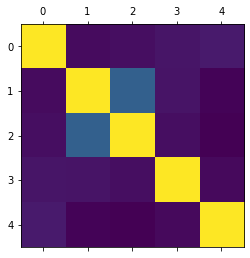

In [ ]:
plt.matshow(companies_states_by_region_new_df.corr())